In [1]:
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
## for explainer
#from lime import lime_tabular
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.model_selection import train_test_split

In [2]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")
df_train['train_test']=1
df_test['train_test']=0

In [3]:
df_train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,train_test
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,1
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,1
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,1
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,1
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,1


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [5]:
df_train.set_index('id',inplace=True)
df_test.set_index('id',inplace=True)

In [6]:
num_cols=['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']
cat_cols=['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','CALC','MTRANS']

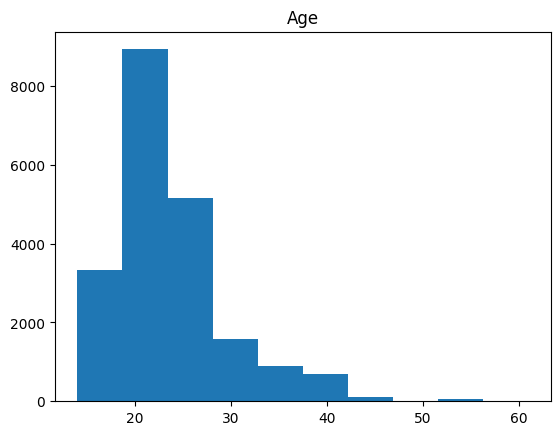

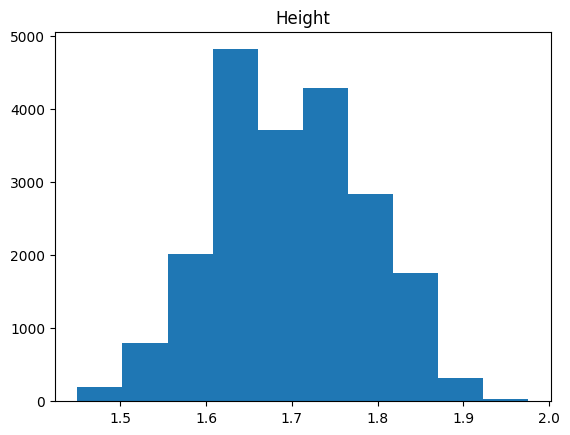

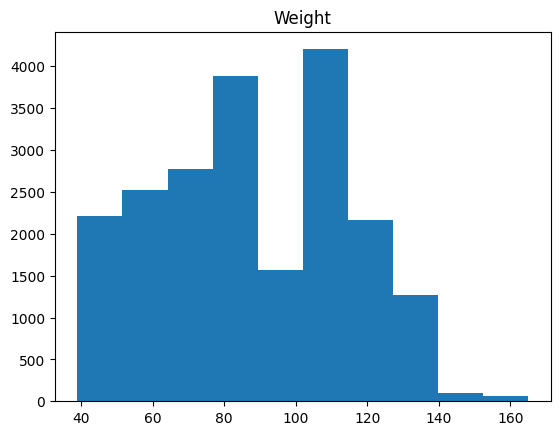

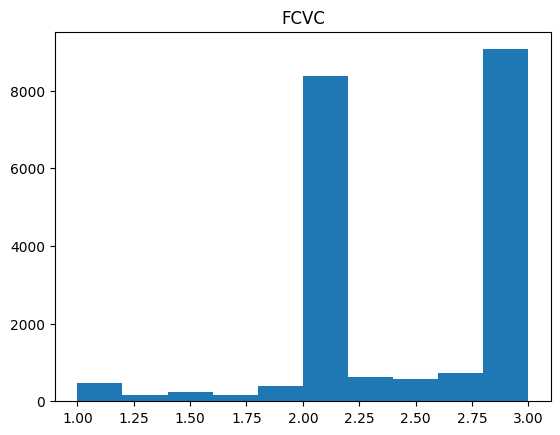

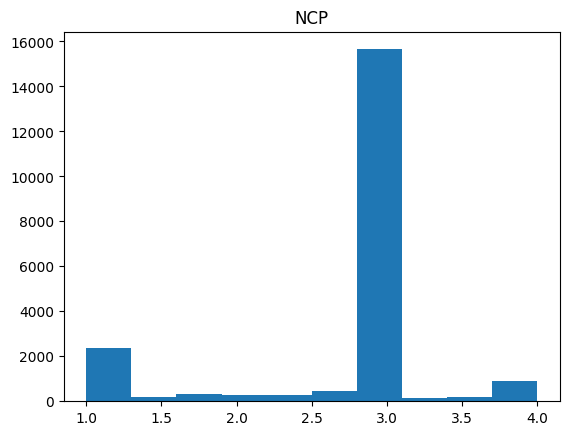

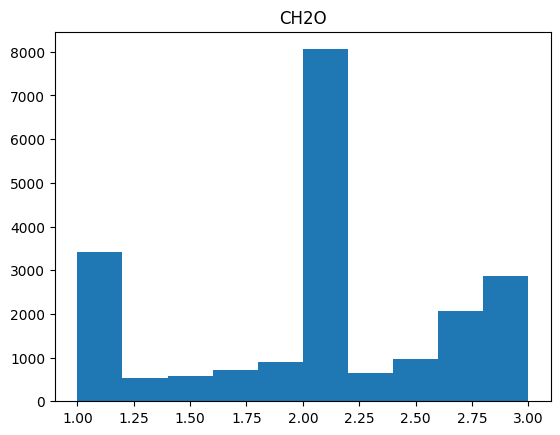

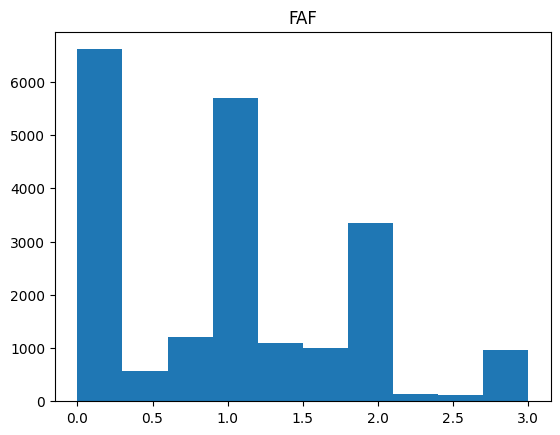

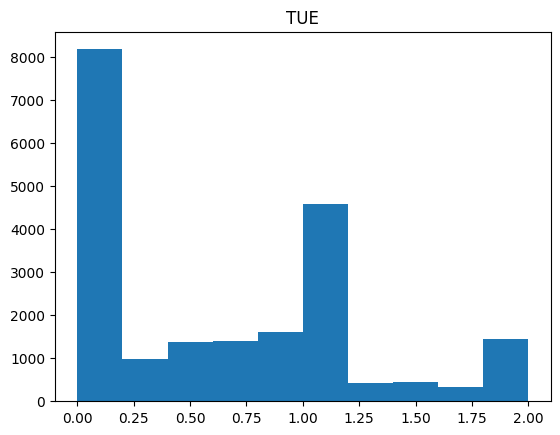

In [7]:
for i in num_cols:
    plt.hist(df_train[i])
    plt.title(i)
    plt.show()

             Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
Age     1.000000 -0.011713  0.283381  0.034414 -0.048479 -0.016325 -0.192259   
Height -0.011713  1.000000  0.416677 -0.071546  0.191383  0.183706  0.295278   
Weight  0.283381  0.416677  1.000000  0.245682  0.095947  0.317914 -0.084845   
FCVC    0.034414 -0.071546  0.245682  1.000000  0.113349  0.101299 -0.089822   
NCP    -0.048479  0.191383  0.095947  0.113349  1.000000  0.080949  0.100871   
CH2O   -0.016325  0.183706  0.317914  0.101299  0.080949  1.000000  0.082932   
FAF    -0.192259  0.295278 -0.084845 -0.089822  0.100871  0.082932  1.000000   
TUE    -0.296154  0.076433 -0.086471 -0.147843  0.067459 -0.010654  0.021213   

             TUE  
Age    -0.296154  
Height  0.076433  
Weight -0.086471  
FCVC   -0.147843  
NCP     0.067459  
CH2O   -0.010654  
FAF     0.021213  
TUE     1.000000  


<Axes: >

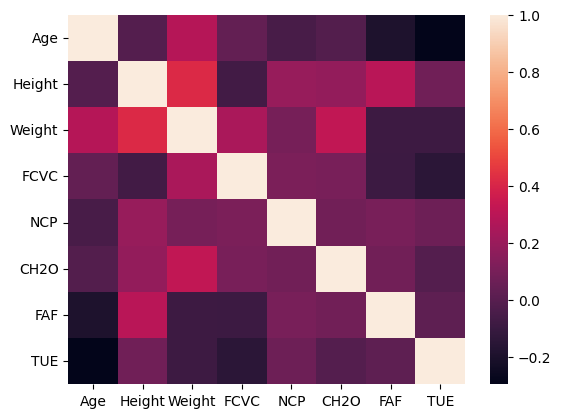

In [9]:
print(df_train[num_cols].corr())
sns.heatmap(df_train[num_cols].corr())

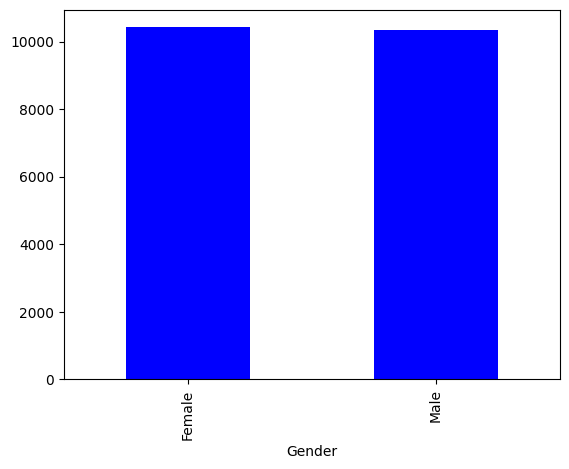

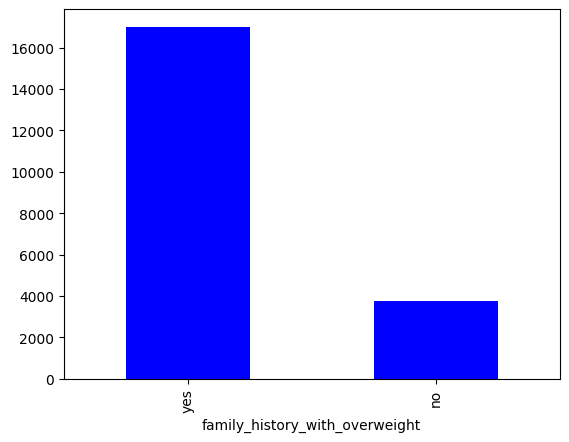

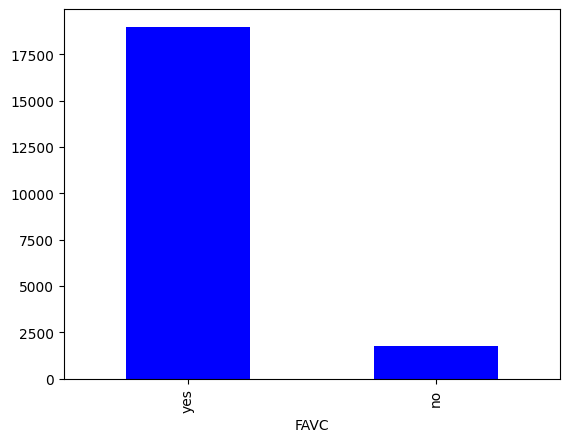

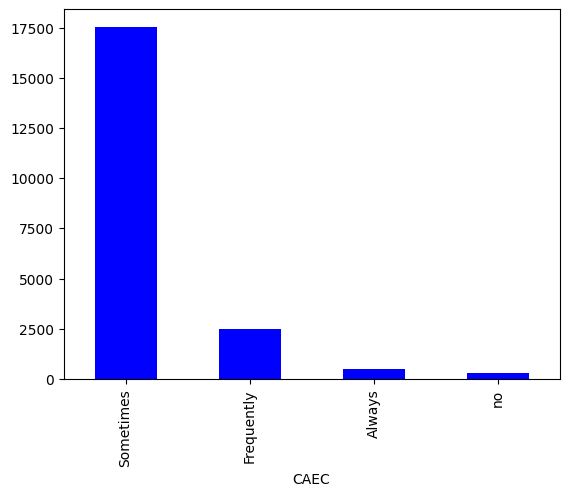

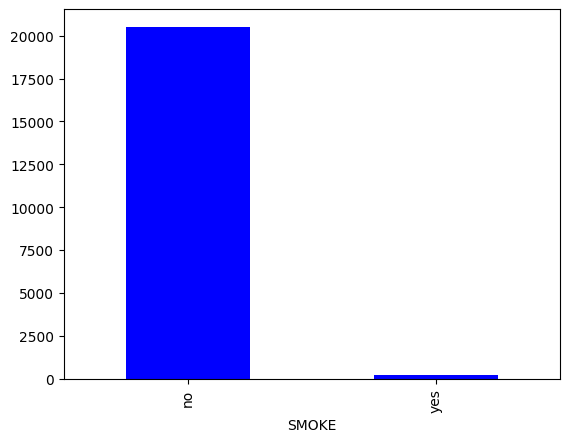

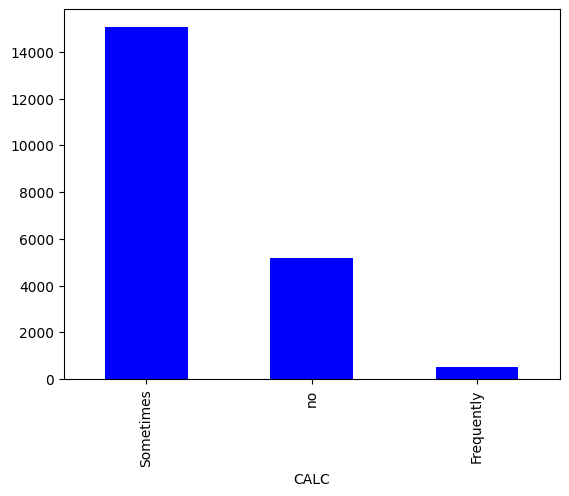

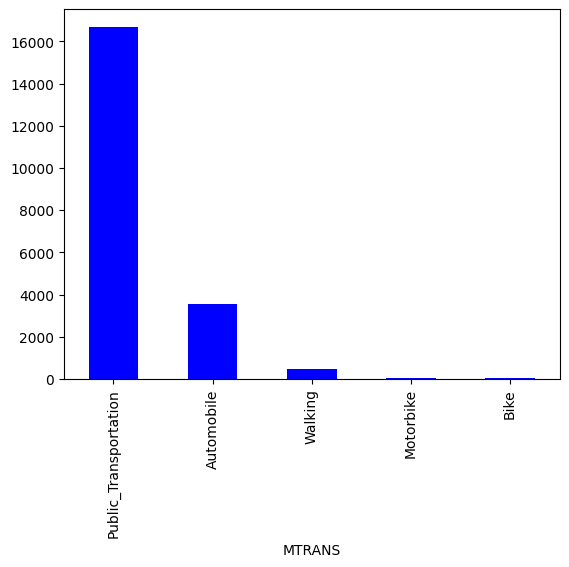

In [10]:
for i in cat_cols:
    df_train[i].value_counts().plot(kind="bar",color='b')
    plt.xlabel(i)
    plt.show()

In [12]:
print(pd.pivot_table(df_train,index='NObeyesdad',columns='Gender',values='Age',aggfunc='count'))
print(pd.pivot_table(df_train,index='NObeyesdad',columns='family_history_with_overweight',values='Age',aggfunc='count'))
print(pd.pivot_table(df_train,index='NObeyesdad',columns='FAVC',values='Age',aggfunc='count'))
print(pd.pivot_table(df_train,index='NObeyesdad',columns='CAEC',values='Age',aggfunc='count'))
print(pd.pivot_table(df_train,index='NObeyesdad',columns='SMOKE',values='Age',aggfunc='count'))
print(pd.pivot_table(df_train,index='NObeyesdad',columns='CALC',values='Age',aggfunc='count'))
print(pd.pivot_table(df_train,index='NObeyesdad',columns='MTRANS',values='Age',aggfunc='count'))

Gender               Female  Male
NObeyesdad                       
Insufficient_Weight    1621   902
Normal_Weight          1660  1422
Obesity_Type_I         1267  1643
Obesity_Type_II           8  3240
Obesity_Type_III       4041     5
Overweight_Level_I     1070  1357
Overweight_Level_II     755  1767
family_history_with_overweight    no   yes
NObeyesdad                                
Insufficient_Weight             1449  1074
Normal_Weight                   1292  1790
Obesity_Type_I                    48  2862
Obesity_Type_II                    5  3243
Obesity_Type_III                   1  4045
Overweight_Level_I               756  1671
Overweight_Level_II              193  2329
FAVC                  no   yes
NObeyesdad                    
Insufficient_Weight  370  2153
Normal_Weight        495  2587
Obesity_Type_I        93  2817
Obesity_Type_II       54  3194
Obesity_Type_III       1  4045
Overweight_Level_I   224  2203
Overweight_Level_II  539  1983
CAEC                 Always 

In [13]:
all_data=pd.concat([df_train,df_test])

In [15]:
all_data['BMI']=(all_data['Weight'])/(all_data['Height'])**2
all_data['BMI']

id
0        28.259565
1        23.422091
2        17.126706
3        44.855798
4        25.599151
           ...    
34593    26.333478
34594    24.524346
34595    17.652091
34596    20.195092
34597    36.836204
Name: BMI, Length: 34598, dtype: float64

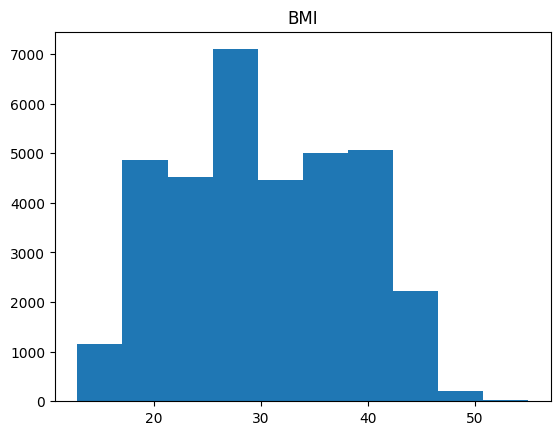

In [16]:
plt.hist(all_data['BMI'])
plt.title('BMI')
plt.show()

In [17]:
all_data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,train_test,BMI
id,,,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,1,28.259565
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,1,23.422091
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,1,17.126706
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,1,44.855798
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,1,25.599151


In [18]:
all_dummies=pd.get_dummies(all_data[['Gender','Age','Height','Weight','family_history_with_overweight','FAVC','FCVC','NCP','CAEC','SMOKE','CH2O','SCC','FAF','TUE','CALC','MTRANS','train_test','BMI']])

In [19]:
all_dummies.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,train_test,BMI,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
id,,,,,,,,,,,,,,,,,,,,,
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,1,28.259565,...,0,0,0,1,0,0,0,0,1,0
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1,23.422091,...,0,0,0,0,1,1,0,0,0,0
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,1,17.126706,...,0,0,0,0,1,0,0,0,1,0
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,1,44.855798,...,0,0,0,1,0,0,0,0,1,0
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,1,25.599151,...,0,0,0,1,0,0,0,0,1,0


In [20]:
X_train=all_dummies[all_dummies.train_test==1].drop(['train_test'],axis=1)
X_test=all_dummies[all_dummies.train_test==0].drop(['train_test'],axis=1)

In [21]:
X_train.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI,Gender_Female,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
id,,,,,,,,,,,,,,,,,,,,,
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,28.259565,0,...,0,0,0,1,0,0,0,0,1,0
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,23.422091,1,...,0,0,0,0,1,1,0,0,0,0
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,17.126706,1,...,0,0,0,0,1,0,0,0,1,0
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,44.855798,1,...,0,0,0,1,0,0,0,0,1,0
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,25.599151,0,...,0,0,0,1,0,0,0,0,1,0


In [22]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20758 entries, 0 to 20757
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 20758 non-null  float64
 1   Height                              20758 non-null  float64
 2   Weight                              20758 non-null  float64
 3   FCVC                                20758 non-null  float64
 4   NCP                                 20758 non-null  float64
 5   CH2O                                20758 non-null  float64
 6   FAF                                 20758 non-null  float64
 7   TUE                                 20758 non-null  float64
 8   BMI                                 20758 non-null  float64
 9   Gender_Female                       20758 non-null  uint8  
 10  Gender_Male                         20758 non-null  uint8  
 11  family_history_with_overweight_no   20758

In [23]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(all_data.NObeyesdad)

In [24]:
y_train_encoded=label_encoder.fit_transform(all_data[all_data.train_test==1].NObeyesdad)
y_train_encoded

array([6, 1, 0, ..., 3, 6, 3])

In [27]:
# Scale data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE','BMI']]= scale.fit_transform(all_dummies_scaled[['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE','BMI']])
all_dummies_scaled

X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)

In [32]:
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_scaled,y_train_encoded,test_size=0.2,random_state=42)

In [30]:
#pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.5 MB/s eta 0:00:00


In [33]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
import optuna

In [34]:
param = {"objective": "multiclass",
    "metric": "multi_logloss",
    "verbosity": -1,
    "boosting_type": "gbdt",
    "random_state": 42,
    "num_class": 7,
    'learning_rate': 0.009,
    'n_estimators': 500,
    'lambda_l1': 0.009,
    'lambda_l2': 0.03,
    'max_depth': 10,
    'colsample_bytree': 0.40977129346872643,
    'subsample': 0.9535797422450176,
    'min_child_samples': 26}

model_lgb = lgb.LGBMClassifier(**param,verbose=100)
model_lgb.fit(X_train_final, y_train_final)
y_pred_val_lgb = model_lgb.predict(X_val)
y_pred_proba = model_lgb.predict_proba(X_val)

In [37]:
def objective(trial):
    thresholds = {}
    for i in range(num_classes):
        thresholds[f'threshold_{i}'] = trial.suggest_uniform(f'threshold_{i}', 0.0, 1.0)

    y_pred = apply_thresholds(pred_proba, thresholds)

    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy


In [38]:
def apply_thresholds(y_proba, thresholds):

    y_pred_labels = np.argmax(y_proba, axis=1)
    for i in range(y_proba.shape[1]):
        y_pred_labels[y_proba[:, i] > thresholds[f'threshold_{i}']] = i

    return y_pred_labels

In [39]:
num_classes = 7
pred_proba = y_pred_proba  # Example: replace with actual y_pred_proba
y_val = y_val  # Example: replace with actual y_val

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# # Get the best thresholds
best_thresholds = study.best_params
print("Best Thresholds:", best_thresholds)

[I 2024-03-02 06:02:48,834] A new study created in memory with name: no-name-6ce40615-c56f-4ce6-9de4-e282ffd6f4e1
<ipython-input-37-a6e699876f9a>:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  thresholds[f'threshold_{i}'] = trial.suggest_uniform(f'threshold_{i}', 0.0, 1.0)
[I 2024-03-02 06:02:48,854] Trial 0 finished with value: 0.8904142581888247 and parameters: {'threshold_0': 0.7202438624326121, 'threshold_1': 0.3293684892310731, 'threshold_2': 0.405917511918627, 'threshold_3': 0.9037590360079077, 'threshold_4': 0.37625079921419136, 'threshold_5': 0.17899082806376365, 'threshold_6': 0.9276084448185965}. Best is trial 0 with value: 0.8904142581888247.
<ipython-input-37-a6e699876f9a>:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0

Best Thresholds: {'threshold_0': 0.3012073987552447, 'threshold_1': 0.6718865160390946, 'threshold_2': 0.8670198293615115, 'threshold_3': 0.6799929540429852, 'threshold_4': 0.4638806546550582, 'threshold_5': 0.4618880050557674, 'threshold_6': 0.3667270838356205}


In [40]:
threshold={'threshold_0': 0.3012073987552447, 'threshold_1': 0.6718865160390946, 'threshold_2': 0.8670198293615115, 'threshold_3': 0.6799929540429852, 'threshold_4': 0.4638806546550582, 'threshold_5': 0.4618880050557674, 'threshold_6': 0.3667270838356205}

In [41]:
y_val_pred = model_lgb.predict_proba(X_val)
y_val_label = apply_thresholds(y_val_pred, threshold)
y_val_label

array([4, 5, 2, ..., 2, 5, 6])

In [42]:
print("Accuracy on validation",accuracy_score(y_val, y_val_label))

Accuracy on validation 0.9082369942196532


In [43]:
y_test_pred = model_lgb.predict_proba(X_test_scaled)
y_test_label = apply_thresholds(y_test_pred, threshold)
y_test_label

array([3, 5, 4, ..., 0, 1, 3])

In [45]:
y_test_label_decoded=label_encoder.inverse_transform(y_test_label)
y_test_label_decoded

array(['Obesity_Type_II', 'Overweight_Level_I', 'Obesity_Type_III', ...,
       'Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_II'],
      dtype=object)

In [46]:
indices = range(20758, 20758 + len(y_test_label_decoded))
df = pd.DataFrame({'id': indices, 'NObeyesdad': y_test_label_decoded})
df.to_csv('output.csv', index=False)

print("CSV file 'output.csv' created successfully.")

CSV file 'Comp1_fm5427.csv' created successfully.
